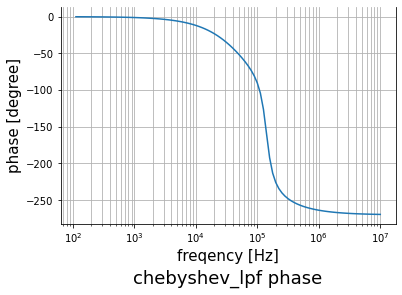

In [19]:
name = 'chebyshev_lpf'

'''
位相用
一行目(name)を扱いたいファイル名にする
拡張子をつけないことに注意
グラフを同名で保存(.png)
タイトルはnameになる
'''

import math
import matplotlib
import matplotlib.pyplot as plt
plt.clf()
matplotlib.use('Agg')
fname = name + '.txt'

file = open(fname, encoding='utf-8')

def calc_db(p,q):
    return 10*math.log10(p**2+q**2)
def calc_phase(p,q):
    ans = math.degrees(math.atan2(q,p))
    return ans if ans < 10 else ans - 360 # phase 不連続対策 適宜調節

# a,b って2配列使ってるのは、今後.txt読み込んだだけの生データ欲しい場合にいじりやすいように
a = []
b = [[],[],[]]
file.readline()

for row in file:
        freq, val = row.split()
        re, im = val.split(",")

        a.append(list(map(float,(freq,re,im))))

        if a[-1][0] > 10**2 and a[-1][0] < 10**7:   #ここのif文をいじってグラフの範囲を変える！
            b[0].append(a[-1][0])
            b[1].append(calc_db(a[-1][1],a[-1][2]))
            b[2].append(calc_phase(a[-1][1],a[-1][2]))

plt.plot(b[0], b[2])
ax = plt.gca()
ax.spines['top'].set_color('none')

ax.set_xscale('log')  #y軸をlogスケールで描く

plt.title(str(name+" phase"),y=-0.3,fontsize=18) 
plt.xlabel('freqency [Hz]',fontsize=15)
plt.ylabel('phase [degree]',fontsize=15)

plt.grid(which="both") # "both"でxy軸両方にgrid

#plt.show() # <- 多分いらない
plt.savefig(name+'_phase.png', bbox_inches='tight')
